In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data=pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [8]:
data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
fuel_type=data['Fuel_Type']
seller_type =data['Seller_Type']
transmission = data['Transmission']
selling_price =data['Selling_Price']

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

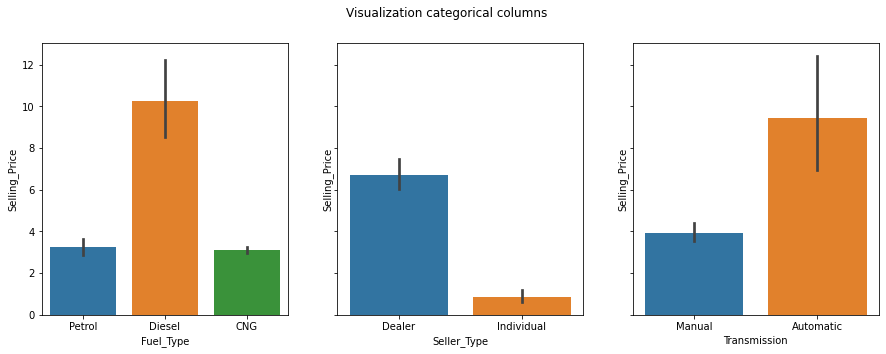

In [11]:
fig,axes =plt.subplots(1,3, figsize=(15,5), sharey =True)
fig.suptitle('Visualization categorical columns')
sns.barplot(x=fuel_type ,y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission, y=selling_price, ax=axes[2])

In [12]:
fuel_price=data.groupby("Fuel_Type").get_group("Petrol")

In [13]:
fuel_price.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [14]:
data=data.replace({"Fuel_Type":{"Petrol" :0,'Diesel':1, 'CNG':2}})

In [15]:
data=pd.get_dummies(data,columns=['Seller_Type','Transmission'],drop_first=True)

In [16]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1
299,city,2017,11.50,12.50,9000,1,0,0,1


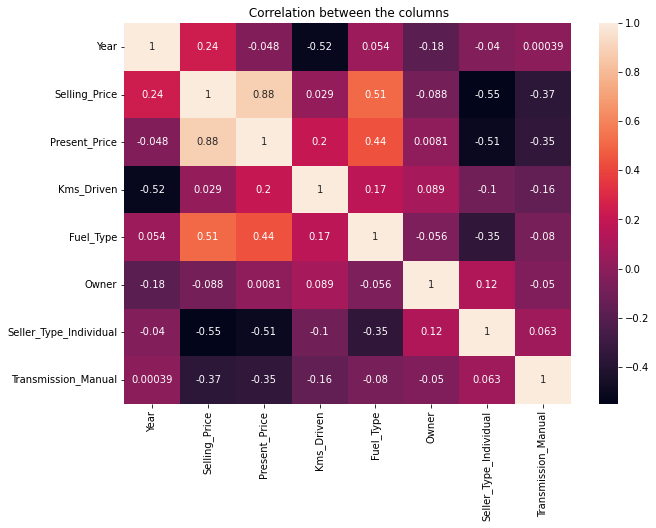

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.title(" Correlation between the columns")
plt.show()

<AxesSubplot:title={'center':' Correlation between the present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

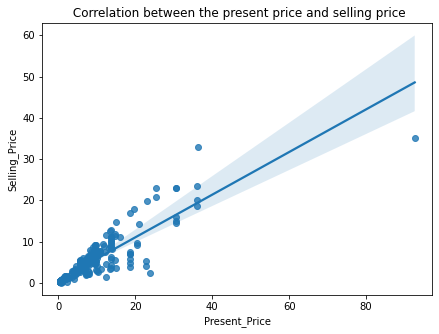

In [18]:
plt.figure(figsize=(7,5))
plt.title(" Correlation between the present price and selling price")
sns.regplot(x='Present_Price', y='Selling_Price', data=data)

In [19]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


In [20]:
X = data.drop(['Car_Name','Selling_Price'], axis=1)
y = data['Selling_Price']

In [21]:
X.shape , y.shape

((301, 7), (301,))

In [22]:
X_train,X_test , y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 7)
(91, 7)
(210,)
(91,)


In [24]:
scaler =StandardScaler()

In [25]:
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
mean_absolute_error(pred, y_test)

1.2581404706473367

In [32]:
mean_squared_error(pred, y_test)

3.493286026225143

In [34]:
r2_score(pred, y_test)

0.8294933369778821

Text(0, 0.5, 'pred values')

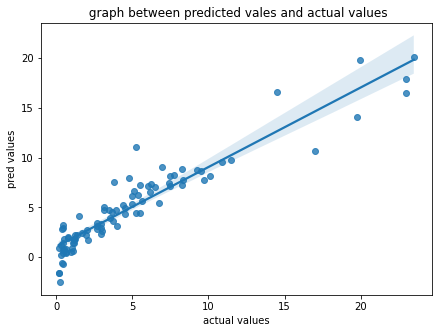

In [39]:
plt.figure(figsize=(7,5))
plt.title(" graph between predicted vales and actual values")
sns.regplot(x=y_test, y=pred)
plt.xlabel("actual values")
plt.ylabel("pred values")

Text(0.5, 0, 'pred values')

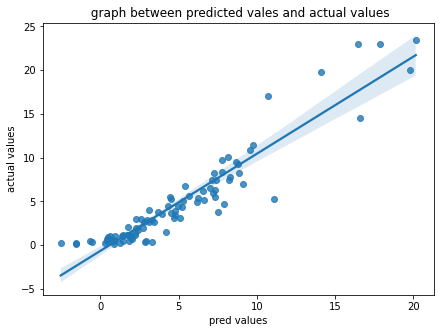

In [41]:
plt.figure(figsize=(7,5))
plt.title(" graph between predicted vales and actual values")
sns.regplot(x=pred,y=y_test)
plt.ylabel("actual values")
plt.xlabel("pred values")